# Data analysis

## Exploratory data analysis

### Correlation

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [29]:
cwd = os.getcwd()
print(cwd)

C:\Users\USER\Downloads\Holmusk_analysis


In [30]:
nan_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/nan_df.csv")
final_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/final_df.csv")

In [31]:
work_on = final_df

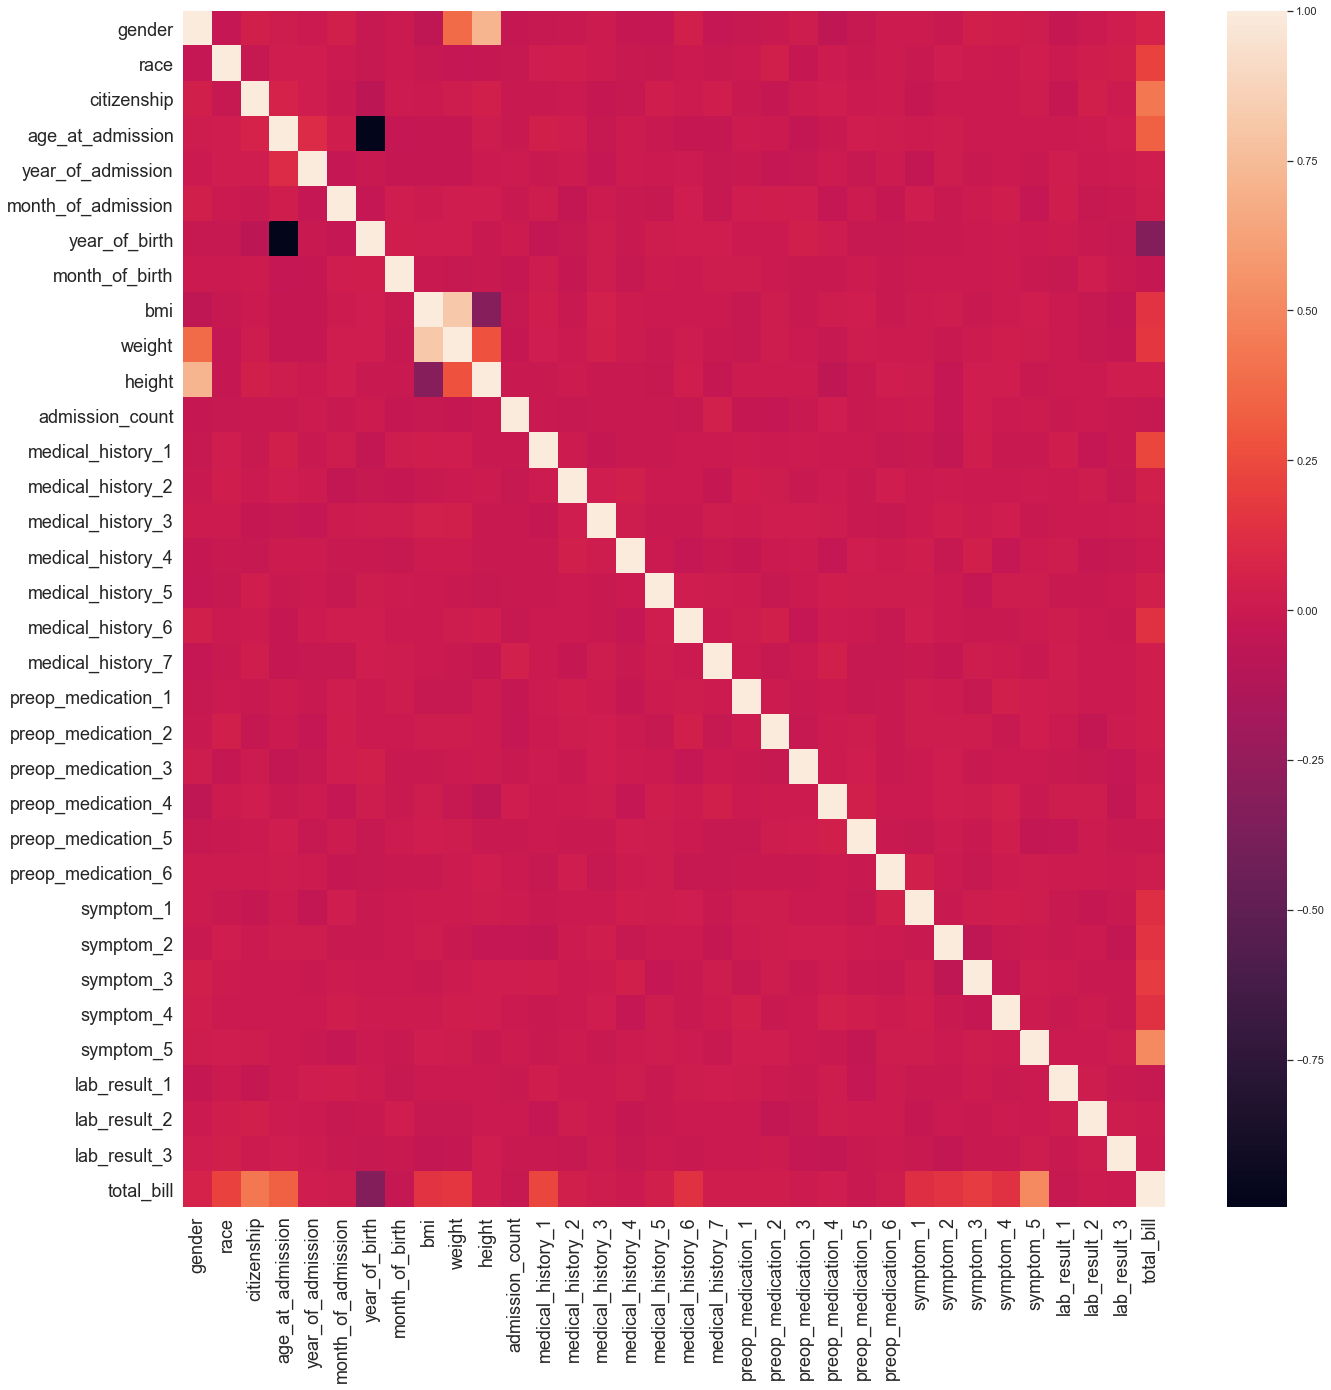

In [34]:
# Plot heat map of correlation
plt.figure(figsize = (22,22))
corrMatrix = work_on.corr()
hm = sns.heatmap(corrMatrix)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=18)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=18)
sns.set(rc = {'figure.figsize': (20,20)})
plt.show()

Some insights from this heatmap:
* Height, weight and BMI are closely related to one another, as we would expect
* Gender is slightly correlated with weight, and more correlated with height
* Year of birth and age at admission are perfectly negatively correlated, as we expect

Most of the factors have some form of relationship with total bill
* These include race, citizenship, age, BMI (not so much), symptom_5, etc.

#### Plot each factor against total bill

In [35]:
len(work_on.columns)

34

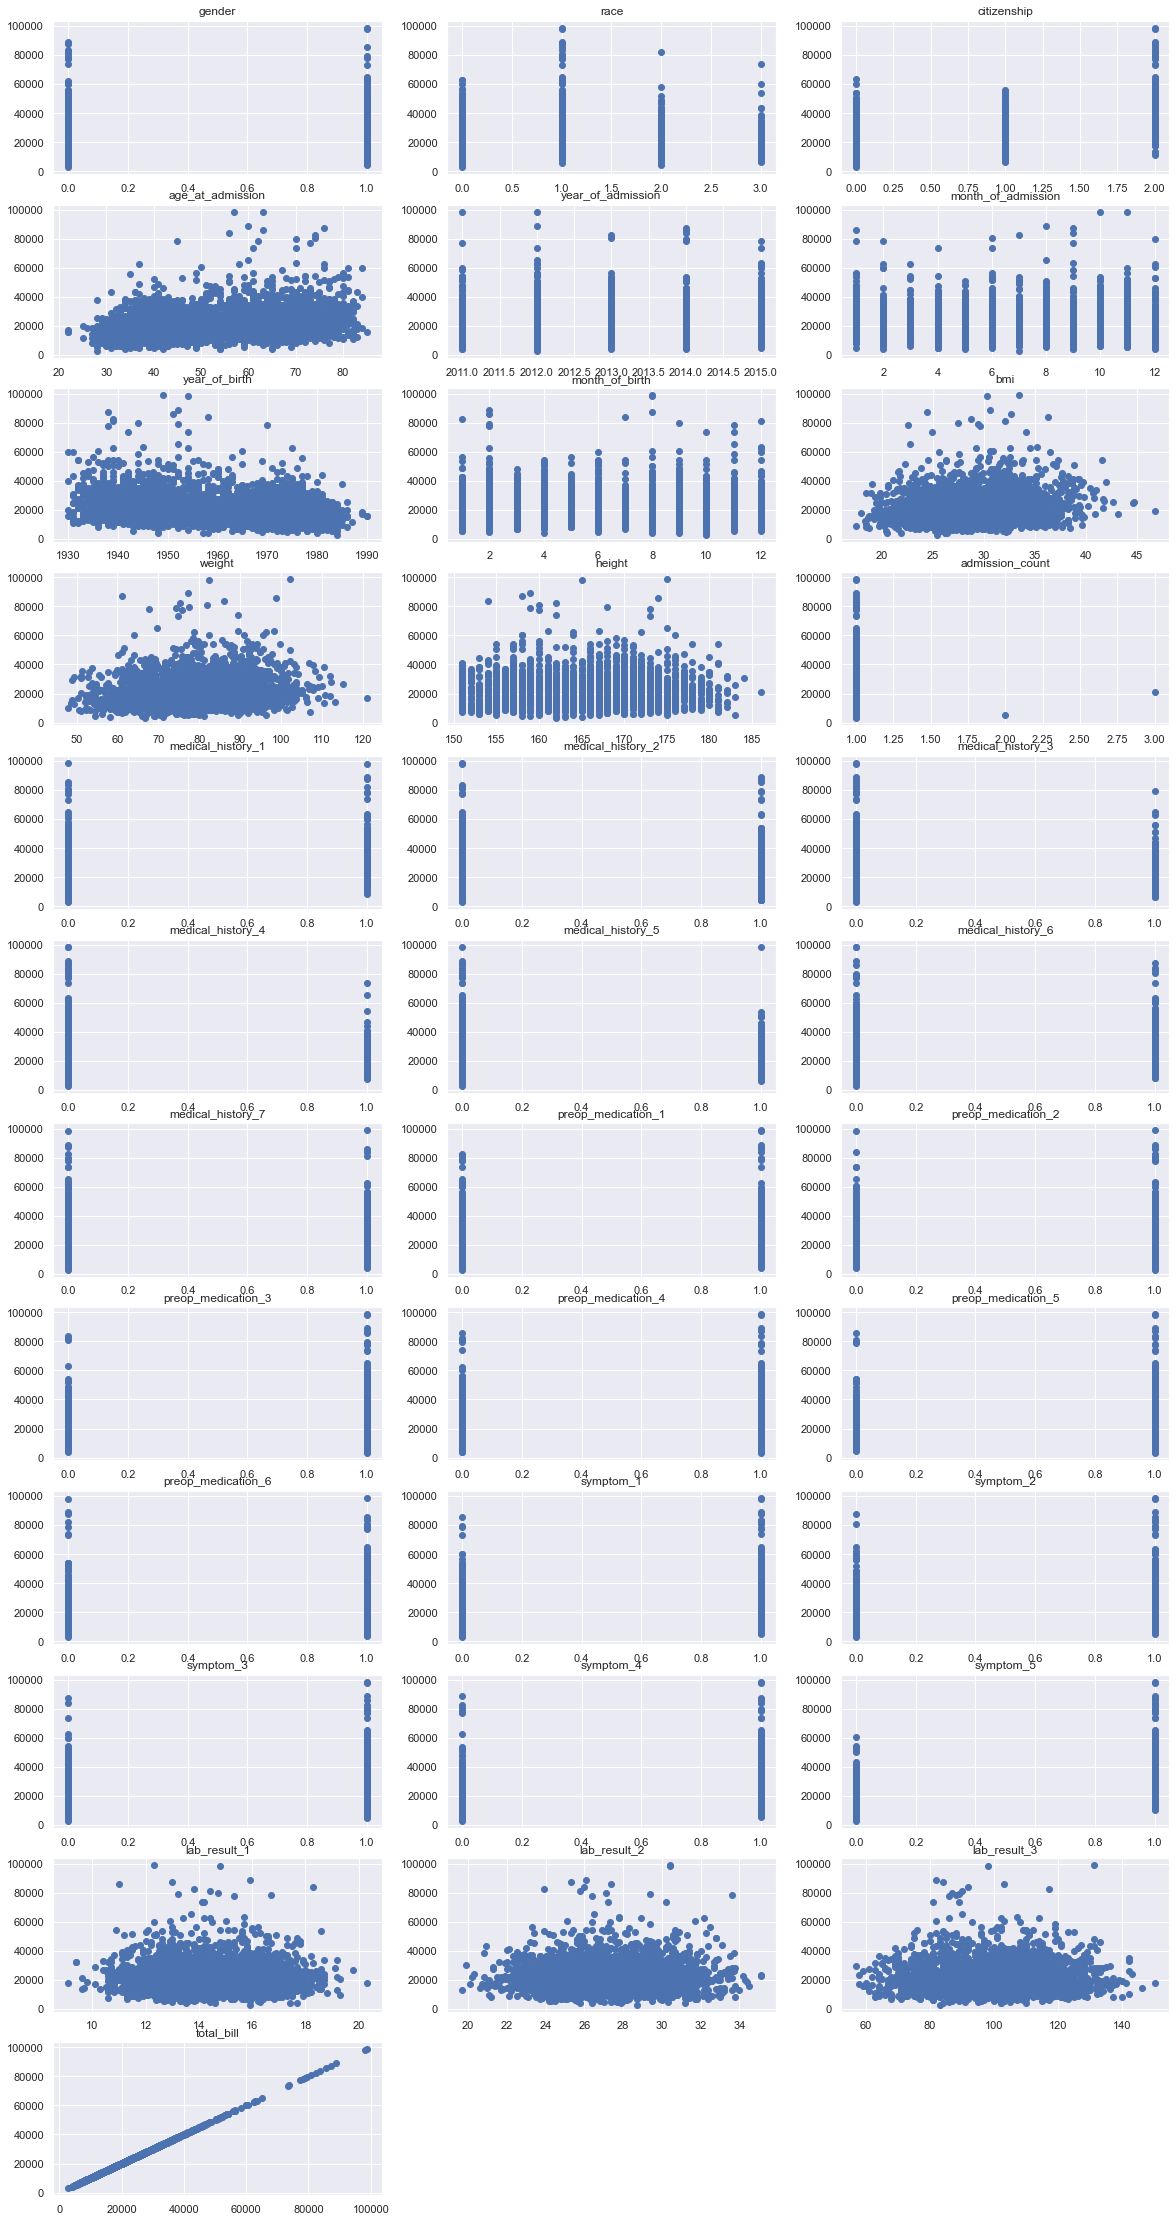

In [36]:
# Scatterplot
fig = plt.figure(1)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 12

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    plt.scatter(work_on[work_on.columns[i]], work_on["total_bill"])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

We don't see any obvious relationship between total bill and the other factors from here

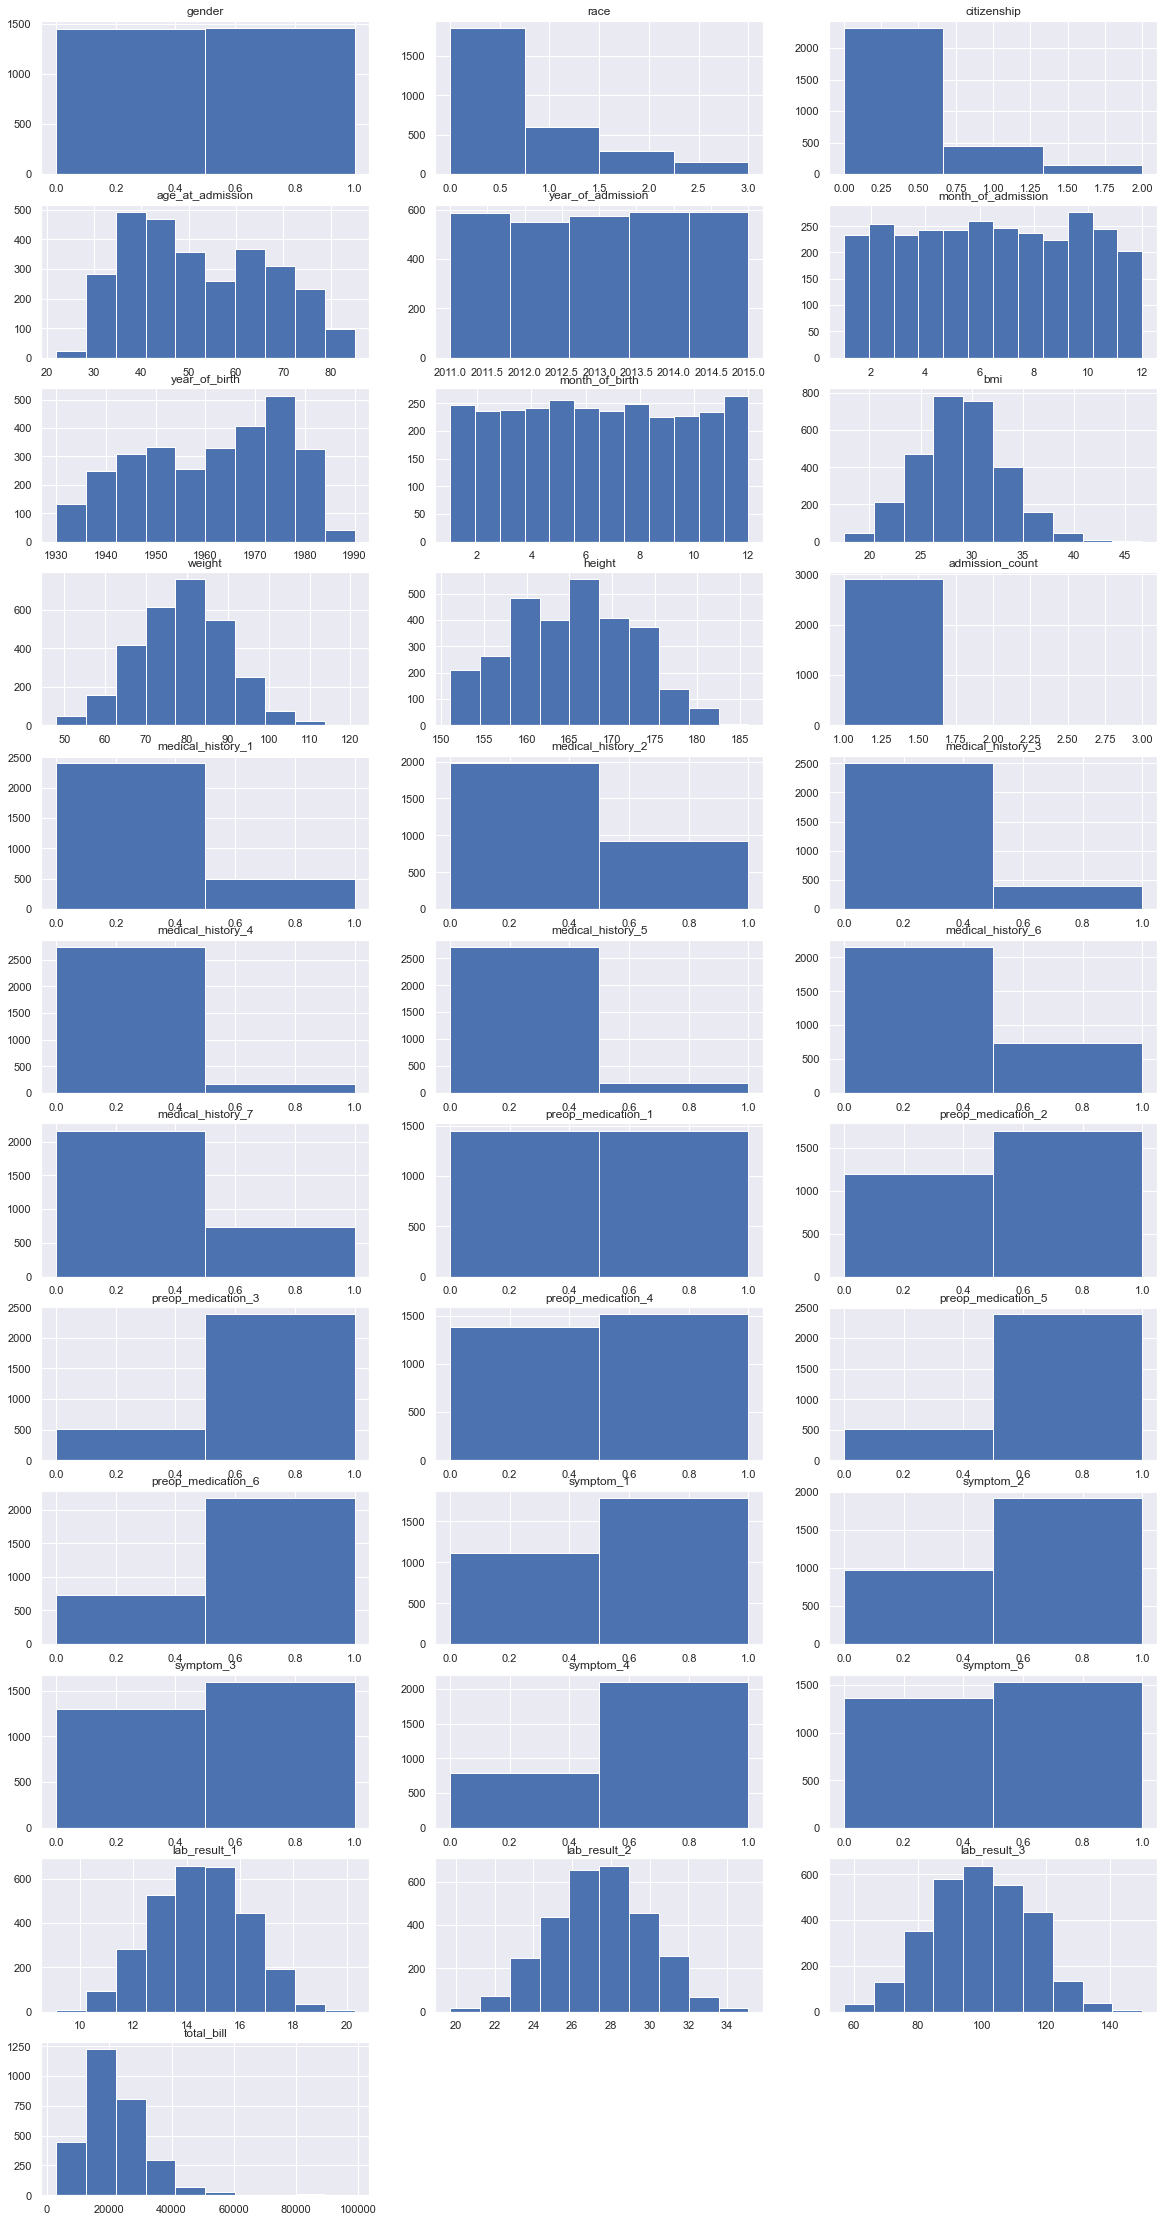

In [37]:
# Histogram
fig = plt.figure(1)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 12

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    if len(work_on[work_on.columns[i]].unique()) < 15:
        bins = len(work_on[work_on.columns[i]].unique())
        plt.hist(work_on[work_on.columns[i]], bins = bins)
    else: 
        plt.hist(work_on[work_on.columns[i]])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

In [44]:
pd.options.display.max_columns = 100
work_on.describe(include="all")

,gender,race,citizenship,age_at_admission,year_of_admission,month_of_admission,year_of_birth,month_of_birth,bmi,weight,height,admission_count,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,total_bill
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,0.501725,0.565217,0.248792,52.432712,2013.015528,6.454451,1960.582816,6.494479,28.980793,78.860041,165.133540,1.001035,0.171498,0.317460,0.137336,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,0.821601,0.522429,0.823671,0.749137,0.615942,0.661836,0.550380,0.725673,0.528295,14.458109,27.421843,99.517253,21945.900483
std,0.500083,0.871870,0.531253,14.680246,1.422039,3.410196,14.599174,3.471985,4.139007,11.033373,7.032675,0.041531,0.377008,0.465569,0.344261,0.227081,0.246343,0.436711,0.435355,0.500086,0.492343,0.382914,0.499583,0.381165,0.433584,0.486456,0.473166,0.497541,0.446252,0.499285,1.746524,2.483794,15.297303,10316.927510
min,0.000000,0.000000,0.000000,22.000000,2011.000000,1.000000,1930.000000,1.000000,17.508651,48.000000,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,57.000000,2946.100000
25%,0.000000,0.000000,0.000000,40.000000,2012.000000,4.000000,1948.000000,4.000000,26.220464,71.300000,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.700000,88.000000,14887.250000
50%,1.000000,0.000000,0.000000,50.000000,2013.000000,6.000000,1962.500000,6.000000,28.967031,79.000000,165.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.400000,27.400000,100.000000,20163.250000
75%,1.000000,1.000000,0.000000,65.000000,2014.000000,9.000000,1973.000000,10.000000,31.684142,86.375000,171.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.700000,29.200000,110.000000,26810.090000
max,1.000000,3.000000,2.000000,85.000000,2015.000000,12.000000,1990.000000,12.000000,46.677349,121.000000,186.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,98723.860000
